<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

This notebook will establish our core utilities: functions for building the diffusion matrix, with various types of kernels.

## Gaussian Kernel
This currently supports either a fixed bandwidth, which applies to all points, or an adaptive bandwidth, that creates a tailor-made bandwidth for each point.

### The Median Heuristic for Kernel Bandwidth
Setting the kernel bandwidth is one of the most important operations with any kernel method. It's important to have a good heuristic to avoid needing to estimate this by trial and error. This function implements the *median heuristic* described in https://arxiv.org/pdf/1707.07269.pdf.

The median heuristic sets the bandwidth to $\sqrt{H_n/2}$, where $H_n$ is the median of the squared distances between the upper triangle of the distance matrix.

In [1]:
#| echo: false
#| output: asis
show_doc(median_heuristic)

---

[source](https://github.com/professorwug/diffusion_curvature/blob/main/diffusion_curvature/kernels.py#L9){target="_blank" style="float:right; font-size:smaller"}

### median_heuristic

>      median_heuristic (D:numpy.ndarray)

|    | **Type** | **Details** |
| -- | -------- | ----------- |
| D | ndarray | the distance matrix |

In [2]:
#| echo: false
#| output: asis
show_doc(gaussian_kernel)

---

[source](https://github.com/professorwug/diffusion_curvature/blob/main/diffusion_curvature/kernels.py#L23){target="_blank" style="float:right; font-size:smaller"}

### gaussian_kernel

>      gaussian_kernel (X:numpy.ndarray, kernel_type='fixed', sigma:float=0,
>                       k:float=10, anisotropic_density_normalization:float=0.5,
>                       threshold_for_small_values:float=1e-05)

Constructs an affinity matrix from pointcloud data, using a gaussian kernel

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| X | ndarray |  | pointcloud data as rows, shape n x d |
| kernel_type | str | fixed | either fixed, or adaptive |
| sigma | float | 0 | if fixed, uses kernel bandwidth sigma. If not set, uses a heuristic to estimate a good sigma value |
| k | float | 10 | if adaptive, creates a different kernel bandwidth for each point, based on the distance from that point to the kth nearest neighbor |
| anisotropic_density_normalization | float | 0.5 | if nonzero, performs anisotropic density normalization |
| threshold_for_small_values | float | 1e-05 | Sets all affinities below this value to zero. Set to zero to disable. |

## Diffusion Matrix

In [3]:
#| echo: false
#| output: asis
show_doc(diffusion_matrix)

---

[source](https://github.com/professorwug/diffusion_curvature/blob/main/diffusion_curvature/kernels.py#L59){target="_blank" style="float:right; font-size:smaller"}

### diffusion_matrix

>      diffusion_matrix (X:numpy.ndarray, kernel_type:str='fixed', sigma=0,
>                        k=10, anisotropic_density_normalization=0.5,
>                        threshold_for_small_values=1e-05)

Creates a diffusion matrix from pointcloud data, by row-normalizing the affinity matrix obtained from the gaussian_kernel function

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| X | ndarray |  | pointcloud data |
| kernel_type | str | fixed | either fixed or adaptive |
| sigma | int | 0 | if fixed, uses kernel bandwidth sigma. If not set, uses a heuristic to estimate a good sigma value |
| k | int | 10 | if adaptive, creates a different kernel bandwidth for each point, based on the distance from that point to the kth nearest neighbor |
| anisotropic_density_normalization | float | 0.5 | if nonzero, performs anisotropic density normalization |
| threshold_for_small_values | float | 1e-05 |  |

## Exploration of different kernel functions

In [ ]:
X = np.random.rand(5,5)
D = pairwise_distances(X)
D

array([[0.        , 0.79694242, 1.32441284, 1.0622539 , 0.8983815 ],
       [0.79694242, 0.        , 1.05372018, 1.071993  , 0.80368695],
       [1.32441284, 1.05372018, 0.        , 0.8524512 , 0.53872047],
       [1.0622539 , 1.071993  , 0.8524512 , 0.        , 0.60318467],
       [0.8983815 , 0.80368695, 0.53872047, 0.60318467, 0.        ]])

In [ ]:
# Get the distance to the kth closest neighbor
distance_to_k_neighbor = np.partition(D,2)[:,2]
# [:,2] # argpartition is more efficient than argsort ([python - How to get indices of top-K values from a numpy array - Stack Overflow](https://stackoverflow.com/questions/65038206/how-to-get-indices-of-top-k-values-from-a-numpy-array))
distance_to_k_neighbor

array([0.8983815 , 0.80368695, 0.8524512 , 0.8524512 , 0.60318467])

Double checking that the code for the adaptive kernel works as intended:

In [ ]:
div2 = distance_to_k_neighbor[:,None] @ np.ones(len(D))[None,:]
div2

array([[0.8983815 , 0.8983815 , 0.8983815 , 0.8983815 , 0.8983815 ],
       [0.80368695, 0.80368695, 0.80368695, 0.80368695, 0.80368695],
       [0.8524512 , 0.8524512 , 0.8524512 , 0.8524512 , 0.8524512 ],
       [0.8524512 , 0.8524512 , 0.8524512 , 0.8524512 , 0.8524512 ],
       [0.60318467, 0.60318467, 0.60318467, 0.60318467, 0.60318467]])

In [ ]:
div1 = np.ones(len(D))[:,None] @ distance_to_k_neighbor[None,:]
div1

array([[0.8983815 , 0.80368695, 0.8524512 , 0.8524512 , 0.60318467],
       [0.8983815 , 0.80368695, 0.8524512 , 0.8524512 , 0.60318467],
       [0.8983815 , 0.80368695, 0.8524512 , 0.8524512 , 0.60318467],
       [0.8983815 , 0.80368695, 0.8524512 , 0.8524512 , 0.60318467],
       [0.8983815 , 0.80368695, 0.8524512 , 0.8524512 , 0.60318467]])

Let's chart the torus with several different diffusion kernels.

In [ ]:
from diffusion_curvature.datasets import torus

In [ ]:
X, ks = torus(n=2000)

In [ ]:
X

array([[-2.38963359, -0.96507252,  0.81663658],
       [ 0.22235817, -2.66057004,  0.74250032],
       [ 0.11289289, -1.485425  , -0.86000167],
       ...,
       [ 0.651027  ,  1.96528896,  0.99752496],
       [ 1.85050078, -2.25123214, -0.40532616],
       [-1.84763303,  1.09939814, -0.98868868]])

To visualize this, we'll build a 3D plot helper, to save time in the future

In [4]:
#| echo: false
#| output: asis
show_doc(plot_3d)

---

[source](https://github.com/professorwug/diffusion_curvature/blob/main/diffusion_curvature/kernels.py#L83){target="_blank" style="float:right; font-size:smaller"}

### plot_3d

>      plot_3d (X, distribution=None, title='', lim=None, use_plotly=False,
>               zlim=None, colorbar=False, cmap='plasma')

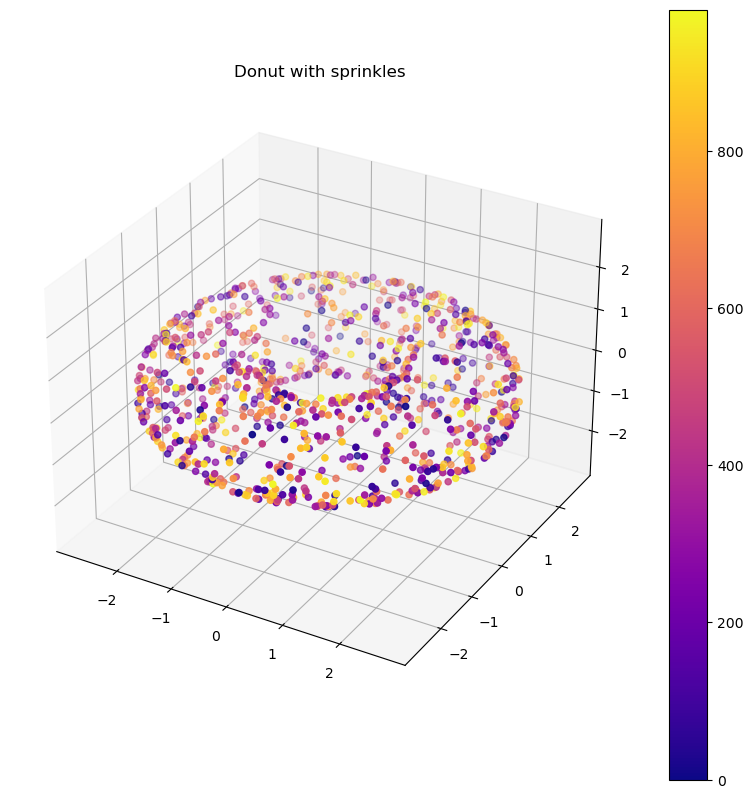

In [ ]:
plot_3d(X,list(range(len(X))),"Donut with sprinkles",colorbar = True)

Hurrah! Our donut is intact, and our plotting function is working as expected.

Now let's visualize some diffusions, under various kernels.

## The Adaptive Kernel

Here we have the adaptive kernel born Diffusion matrix, and we visualize the diffusion centered on the point (0,-3,0), which (from the view of the plot below), should be on the outer rim of the torus, facing us directly.

In [ ]:
P = diffusion_matrix(X,kernel_type="adaptive",k=20)

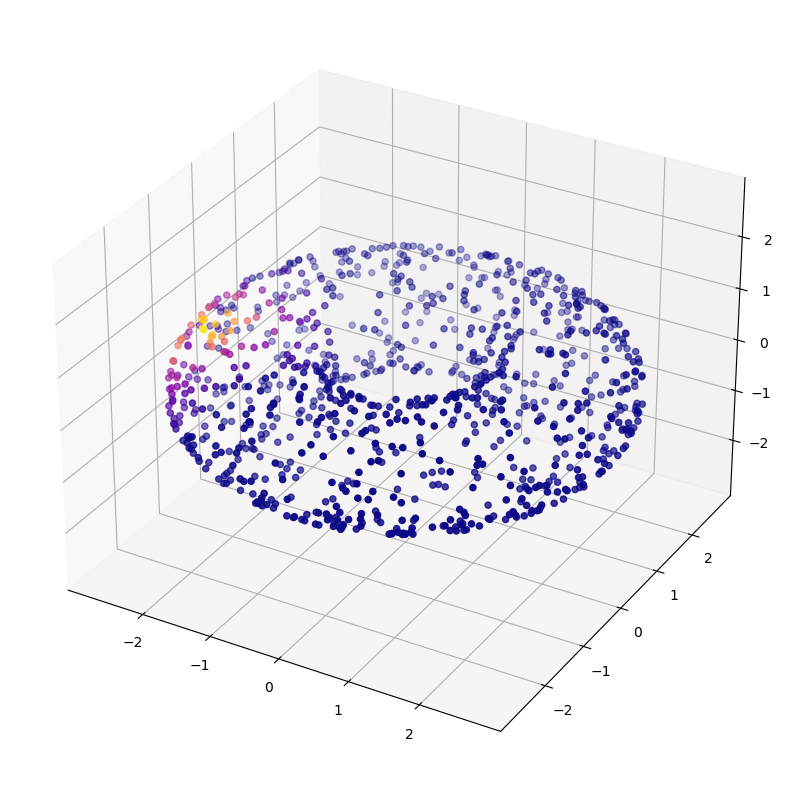

In [ ]:
dist = P[0]
plot_3d(X,dist)

## The Adaptive Anisotropic Kernel

Now we'll add one more round of density normalization with the "adaptive anisotropic" kernel:
$$ W_{a} = D^{-1} W D^{-1} $$
Where D is the matrix whose diagonals are the rowsums of W.

In [ ]:
P = diffusion_matrix(X,kernel_type="adaptive",k=20,anisotropic_density_normalization=1)

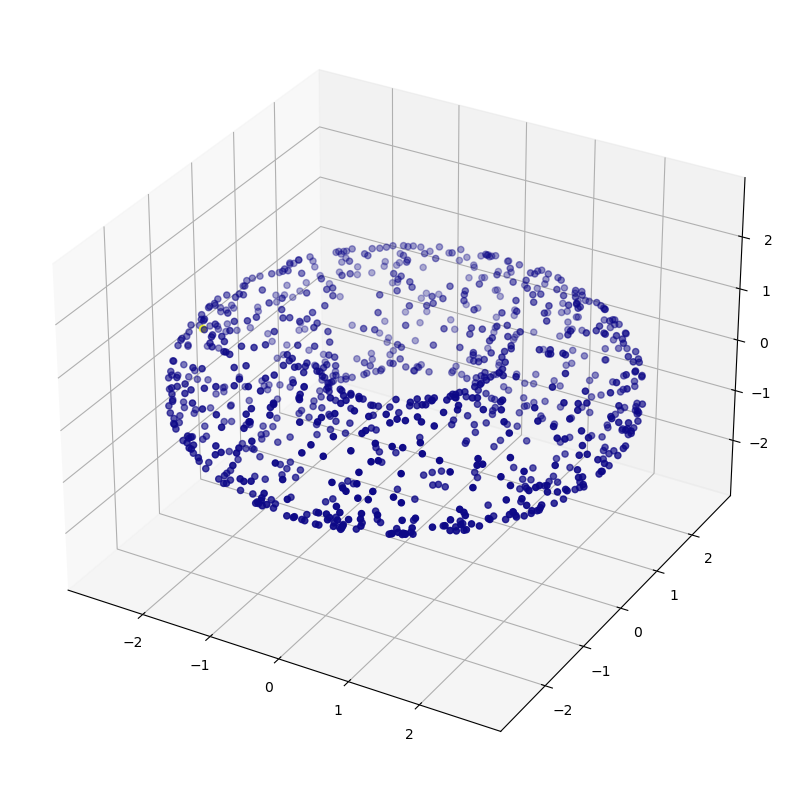

In [ ]:
dist = P[0]
plot_3d(X,dist)

It looks much the same, as expected. Ideally, this kernel will combat density related differences in the curvature, by equalizing the density.

In [ ]:
from diffusion_curvature.datasets import sphere

In [ ]:
X, ks = sphere(2000)

In [ ]:
A = gaussian_kernel(X,kernel_type = "adaptive", k = 10, anisotropic_density_normalization = 1, threshold_for_small_values=1e-5)

In [ ]:
A

array([[0.0008864 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00087881, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00113487, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.00083949, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00071587,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.0009776 ]])

In [ ]:
sum(A)

array([0.01780748, 0.01605671, 0.01757066, ..., 0.01677266, 0.01705182,
       0.01707113])

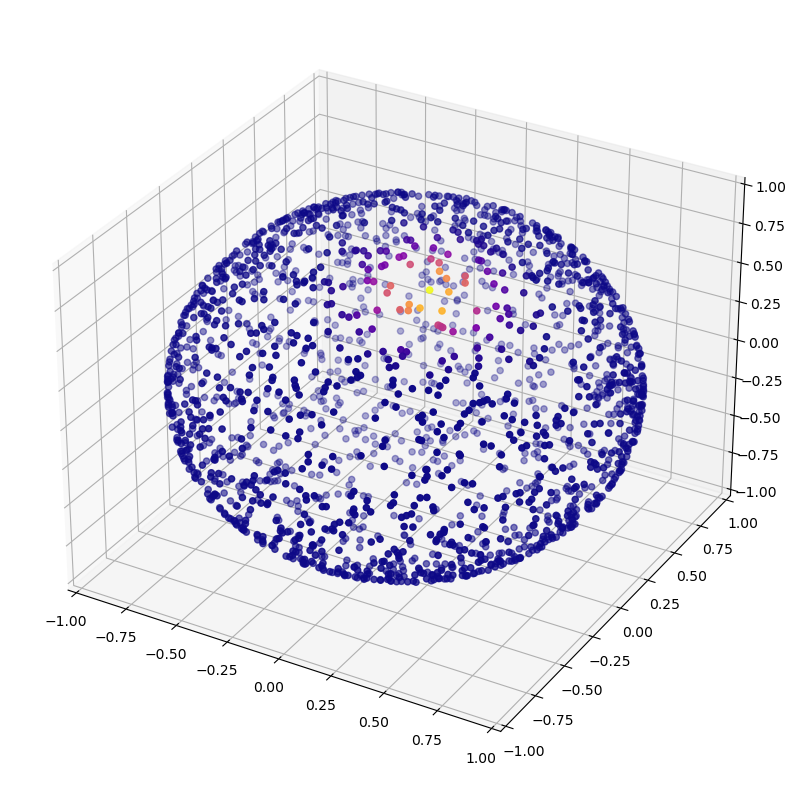

In [ ]:
plot_3d(X,A[0])

In [5]:
#| echo: false
#| output: asis
show_doc(compute_anisotropic_diffusion_matrix_from_graph)

---

[source](https://github.com/professorwug/diffusion_curvature/blob/main/diffusion_curvature/kernels.py#L117){target="_blank" style="float:right; font-size:smaller"}

### compute_anisotropic_diffusion_matrix_from_graph

>      compute_anisotropic_diffusion_matrix_from_graph (A:numpy.ndarray,
>                                                       alpha:float)

|    | **Type** | **Details** |
| -- | -------- | ----------- |
| A | ndarray | the adjacency/affinity matrix of the graph |
| alpha | float | the anisotropic density normalization parameter |
| **Returns** | **ndarray** |  |

In [6]:
#| echo: false
#| output: asis
show_doc(compute_anisotropic_affinities_from_graph)

---

[source](https://github.com/professorwug/diffusion_curvature/blob/main/diffusion_curvature/kernels.py#L108){target="_blank" style="float:right; font-size:smaller"}

### compute_anisotropic_affinities_from_graph

>      compute_anisotropic_affinities_from_graph (A:numpy.ndarray, alpha:float)

|    | **Type** | **Details** |
| -- | -------- | ----------- |
| A | ndarray | the adjacency/affinity matrix of the graph |
| alpha | float | the anisotropic density normalization parameter |
| **Returns** | **ndarray** |  |

In [ ]:
!nbdev_export